In [1]:
%matplotlib inline

import numpy as np
import modisco
import simdna.synthetic as synthetic

!./grab_data.sh
data_filename = "sequences.simdata.gz"
data = synthetic.read_simdata_file(data_filename)
task0_indices = np.nonzero(data.labels[:,0] == 1)[0]

File sequences.simdata.gz exists already


In [2]:
def one_hot_encode_along_channel_axis(sequence):
    #theano dim ordering, uses row axis for one-hot
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
onehot_data = np.array(
    [one_hot_encode_along_channel_axis(seq)
     for seq in data.sequences])[task0_indices]
print(onehot_data.shape)

(2000, 200, 4)


In [3]:
onehot_data.shape

(2000, 200, 4)

In [7]:
scores = np.load("task0importancescores.npy")
hyp_scores = np.load("task0hypimpscores.npy")
print(scores.shape)
print(hyp_scores.shape)

(2000, 200, 4)
(2000, 200, 4)


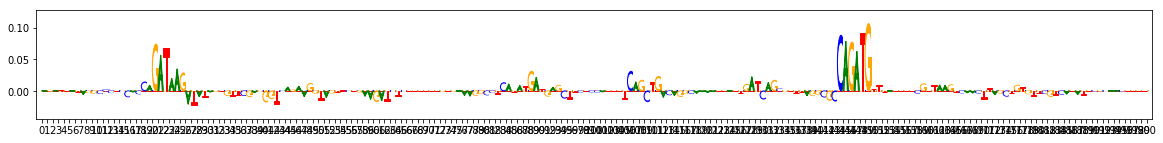

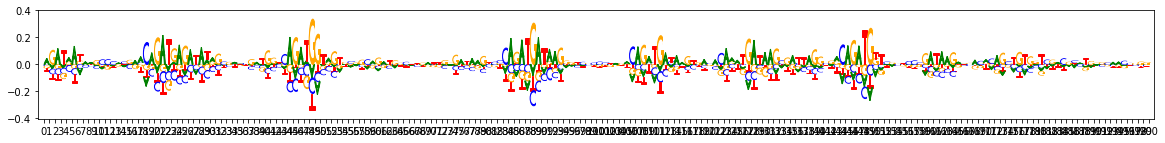

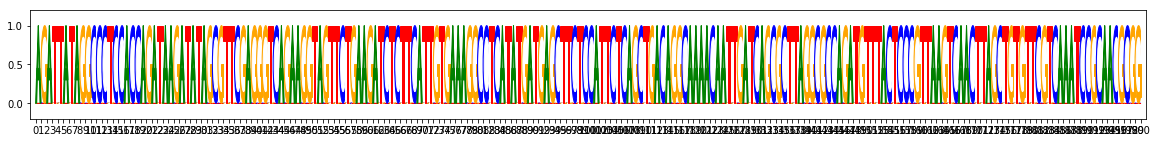

In [8]:
import modisco.visualization
from modisco.visualization import viz_sequence

viz_sequence.plot_weights(scores[0])
viz_sequence.plot_weights(hyp_scores[0])
viz_sequence.plot_weights(onehot_data[0])

In [9]:
import numpy as np

def one_hot_encode_along_channel_axis(sequence):
    #theano dim ordering, uses row axis for one-hot
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
onehot_data = np.array([one_hot_encode_along_channel_axis(seq)
                        for seq in data.sequences])[task0_indices]
print(onehot_data.shape)

(2000, 200, 4)


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29



On task task0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Got 11859 coords
Computing thresholds
Bandwidth calculated: 0.0388076193631


Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN not available)


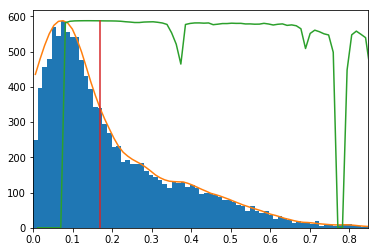

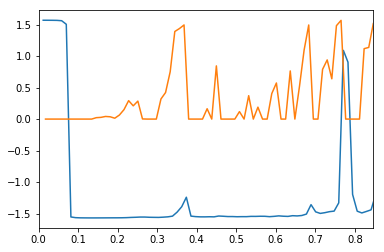

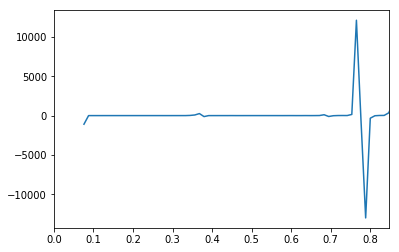

Computed threshold 0.169366652369
5126 coords remaining after thresholding
After resolving overlaps, got 5126 seqlets
2 activity patterns with support >= 200 out of 3 possible patterns
Metacluster sizes:  [3886, 1240]
Idx to activities:  {0: '1', 1: '-1'}
On metacluster 1
Metacluster size 1240
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
(Round 1) num seqlets: 1240
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 2.08 s
Starting affinity matrix computations
Normalization computed in 0.28 s
Cosine similarity mat computed in 1.62 s
Normalization computed in 0.28 s
Cosine similarity mat computed in 1.61 s
Finished affinity matrix computations in 3.23 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.05 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 5.1 s
Launching nearest neighbors affmat calcu

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.7s finished


Louvain completed 200 runs in 1.27973198891 seconds
Wrote graph to binary file in 0.119312763214 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.768741
Louvain completed 51 runs in 1.69920420647 seconds
Preproc + Louvain took 3.21351599693 s
Got 6 clusters after round 1
Counts:
{0: 150, 1: 129, 2: 128, 3: 104, 4: 92, 5: 28}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 150 seqlets
Trimmed 4 out of 150
Skipped 115 seqlets
Skipped 5 seqlets
Dropping cluster 0 with 26 seqlets due to sign disagreement
Aggregating for cluster 1 with 129 seqlets
Trimmed 17 out of 129
Skipped 8 seqlets
Dropping cluster 1 with 104 seqlets due to sign disagreement
Aggregating for cluster 2 with 128 seqlets
Trimmed 14 out of 128
Skipped 11 seqlets
Dropping cluster 2 with 103 seqlets due to sign disagreement
Aggregating for cluster 3 with 104 seqlets
Trimmed 19 out of 104
Skipped 4 seqlets
Dropping cluster 3 with 81 seqlets due to sign disag

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.6s finished


Louvain completed 200 runs in 1.06775808334 seconds
Wrote graph to binary file in 0.0015549659729 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.71056
Louvain completed 51 runs in 1.15038990974 seconds
Preproc + Louvain took 2.27441000938 s
Got 4 clusters after round 2
Counts:
{0: 5, 1: 4, 2: 4, 3: 4}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 5 seqlets
Trimmed 0 out of 5
Aggregating for cluster 1 with 4 seqlets
Trimmed 0 out of 4
Aggregating for cluster 2 with 4 seqlets
Trimmed 0 out of 4
Dropping cluster 2 with 4 seqlets due to sign disagreement
Aggregating for cluster 3 with 4 seqlets
Trimmed 0 out of 4
Skipped 1 seqlets
Got 3 clusters
Splitting into subclusters...
Merging on 3 clusters
On merging iteration 1
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 3 patterns after merging
Performing seqlet reassignment
Got 0 patterns after reassignment
Total time taken is 28.46s
On 

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.8s finished


Louvain completed 200 runs in 1.47888088226 seconds
Wrote graph to binary file in 0.134637117386 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.670765
After 3 runs, maximum modularity is Q = 0.674767
After 9 runs, maximum modularity is Q = 0.675691
After 28 runs, maximum modularity is Q = 0.67601
After 31 runs, maximum modularity is Q = 0.679776
After 59 runs, maximum modularity is Q = 0.688466
Louvain completed 109 runs in 4.33399605751 seconds
Preproc + Louvain took 6.06070303917 s
Got 9 clusters after round 1
Counts:
{0: 182, 1: 141, 2: 136, 3: 130, 4: 32, 5: 30, 6: 20, 7: 13, 8: 7}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 182 seqlets
Trimmed 14 out of 182
Skipped 45 seqlets
Aggregating for cluster 1 with 141 seqlets
Trimmed 70 out of 141
Skipped 9 seqlets
Skipped 3 seqlets
Aggregating for cluster 2 with 136 seqlets
Trimmed 65 out of 136
Skipped 9 seqlets
Skipped 5 seqlets
Aggregating for cluster 3 with 1

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.7s finished


Louvain completed 200 runs in 1.33103895187 seconds
Wrote graph to binary file in 0.0796439647675 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.640996
After 7 runs, maximum modularity is Q = 0.644183
Louvain completed 57 runs in 1.93245601654 seconds
Preproc + Louvain took 3.44416904449 s
Got 12 clusters after round 2
Counts:
{0: 78, 1: 78, 2: 77, 3: 61, 4: 25, 5: 17, 6: 15, 7: 15, 8: 12, 9: 11, 10: 11, 11: 6}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 78 seqlets
Trimmed 11 out of 78
Skipped 3 seqlets
Aggregating for cluster 1 with 78 seqlets
Trimmed 1 out of 78
Skipped 5 seqlets
Aggregating for cluster 2 with 77 seqlets
Trimmed 8 out of 77
Skipped 4 seqlets
Aggregating for cluster 3 with 61 seqlets
Trimmed 5 out of 61
Skipped 4 seqlets
Aggregating for cluster 4 with 25 seqlets
Trimmed 1 out of 25
Skipped 4 seqlets
Aggregating for cluster 5 with 17 seqlets
Trimmed 1 out of 17
Skipped 2 seqlets
Aggregating for

In [10]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.theano_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow()(
                task_names=["task0"],
                contrib_scores={'task0': scores},
                hypothetical_contribs={'task0': hyp_scores},
                one_hot=onehot_data)

In [11]:
import h5py
import modisco.util
reload(modisco.util)
!rm task0_results.hdf5
grp = h5py.File("task0_results.hdf5")
tfmodisco_results.save_hdf5(grp)

2
pattern_0
('total seqlets:', 216)
fwd:


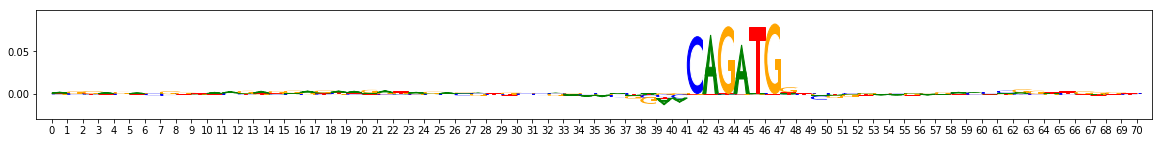

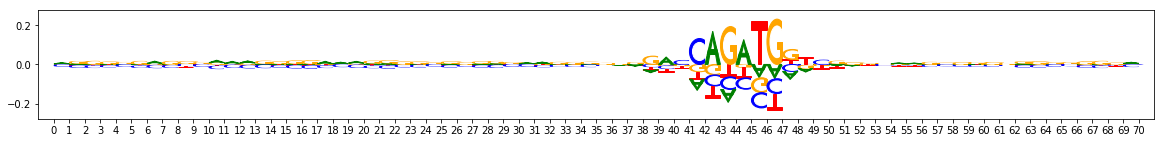

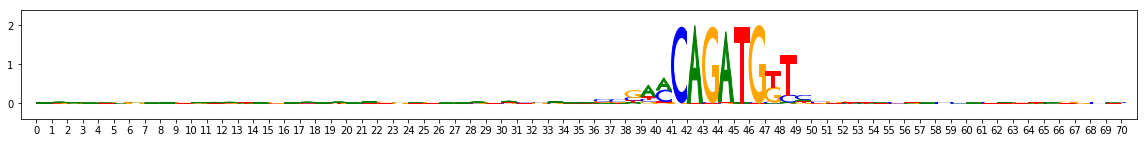

reverse:


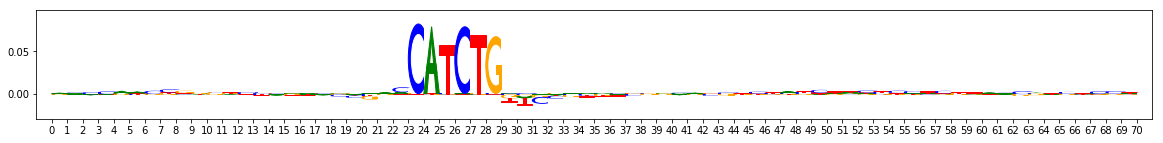

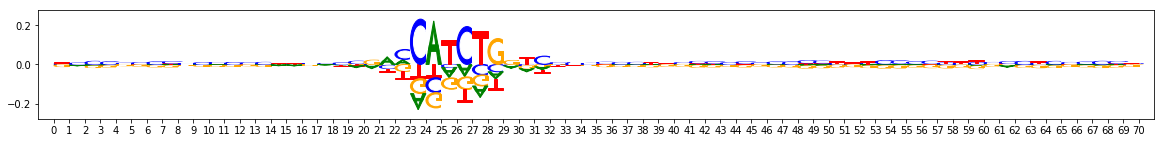

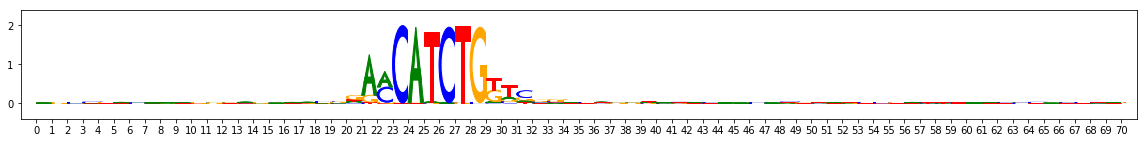

pattern_1
('total seqlets:', 73)
fwd:


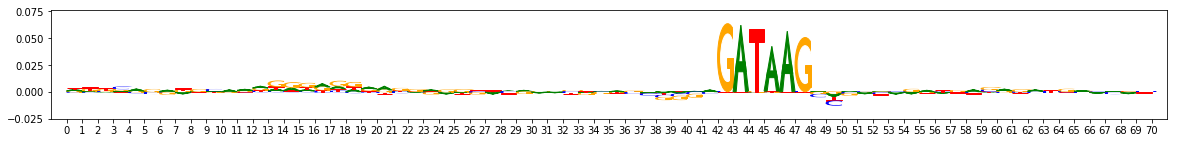

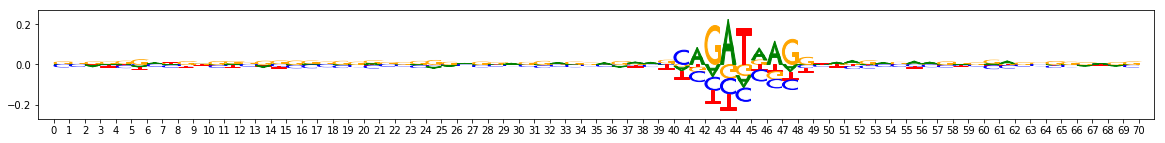

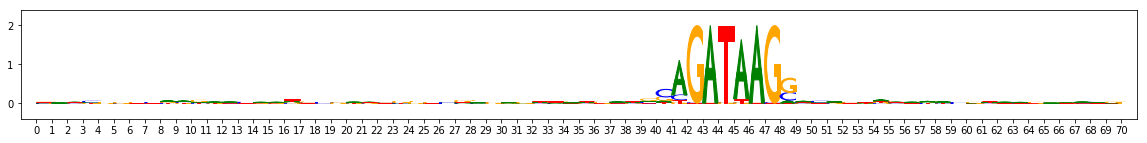

reverse:


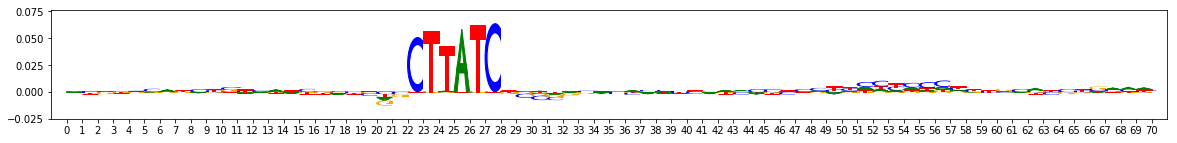

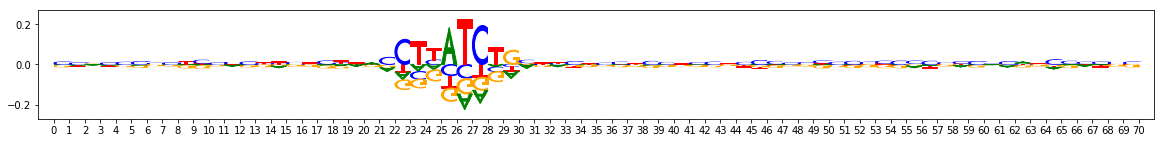

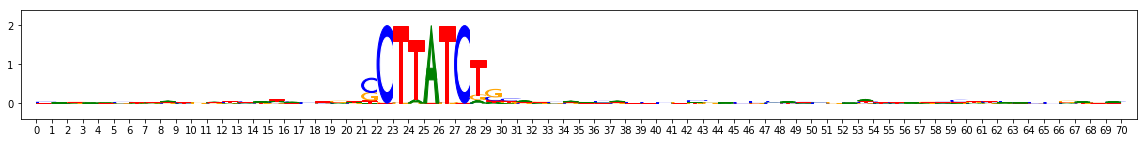

In [17]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

import sklearn.decomposition
import sklearn.manifold

hdf5_results = h5py.File("task0_results.hdf5")

#patterns = (tfmodisco_results
#            .metacluster_idx_to_submetacluster_results[0]
#            .seqlets_to_patterns_result.patterns);
patterns = (list(hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"]["all_pattern_names"]))
print(len(patterns))
pattern_grp = (hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"])

for pattern_name in patterns:
    pattern = pattern_grp[pattern_name]
    print(pattern_name)
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    #pattern.plot_counts(counts=aggregated_seqlet.get_per_position_seqlet_center_counts())
    background = np.array([0.27, 0.23, 0.23, 0.27])
    print("fwd:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                    background=background))

    print("reverse:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["rev"])
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["rev"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                    background=background))

In [15]:
pattern.keys()

[u'seqlets_and_alnmts',
 u'sequence',
 u'task0_contrib_scores',
 u'task0_hypothetical_contribs']